# Lab 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.decomposition import PCA

### Funcion para mostrar dimensiones

In [3]:
def print_image_sizes(image_files):
    """Prints the dimensions of each image in the provided file list."""
    for idx, file in enumerate(image_files):
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        if img is not None:
            H, W = img.shape
            print(f"Image {idx+1}: {file} -> Size: {H}x{W}")
        else:
            print(f"Error: Could not load {file}")

### Procesamiento de imagenes

Image 1: image1.jpg -> Size: 400x720
Image 2: image2.jpg -> Size: 1300x1740
Image 3: image3.jpg -> Size: 1000x720


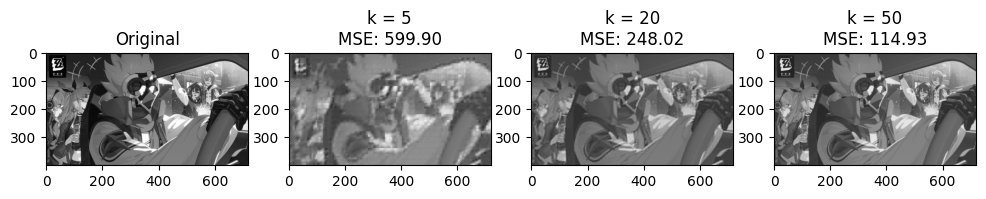

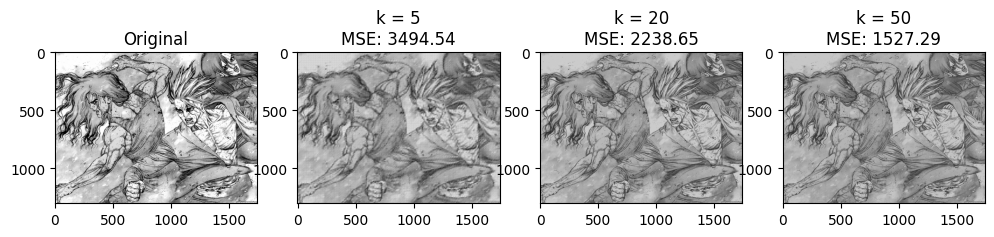

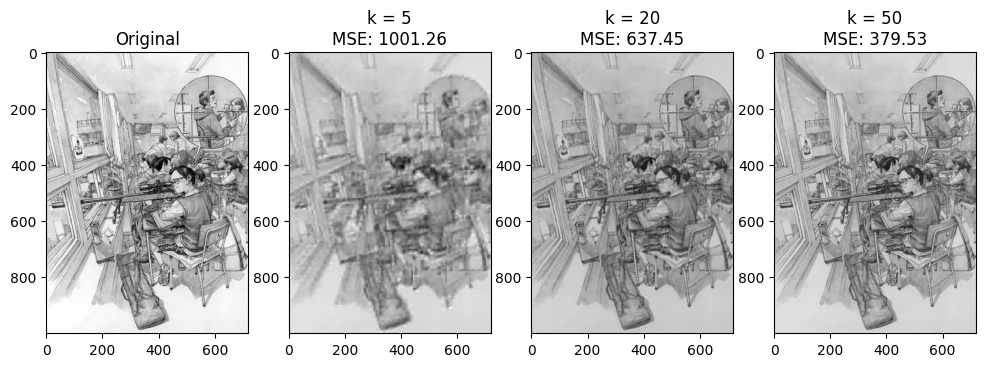

In [5]:
image_files = ["image1.jpg", "image2.jpg", "image3.jpg"] 
print_image_sizes(image_files)

images = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in image_files]

C = 20
k_values = [5, 20, 50]  # Valores de k para evaluar la compresión

# Función para dividir en bloques CxC
def split_into_blocks(image, C):
    H, W = image.shape
    blocks = [
        image[i:i+C, j:j+C].flatten()  # Vectorizar cada bloque
        for i in range(0, H, C) for j in range(0, W, C)
    ]
    return np.array(blocks), H, W

# Reconstruir la imagen desde los bloques
def reconstruct_from_blocks(blocks, H, W, C):
    reconstructed = np.zeros((H, W))
    index = 0
    for i in range(0, H, C):
        for j in range(0, W, C):
            reconstructed[i:i+C, j:j+C] = blocks[index].reshape(C, C)
            index += 1
    return reconstructed

for img_index, img in enumerate(images):
    blocks, H, W = split_into_blocks(img, C)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, len(k_values)+1, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original")
    
    for i, k in enumerate(k_values):
        # PCA
        pca = PCA(n_components=k)
        compressed = pca.fit_transform(blocks)  # Proyectar en k dimensiones
        reconstructed_blocks = pca.inverse_transform(compressed)
        
        reconstructed_image = reconstruct_from_blocks(reconstructed_blocks, H, W, C)
        
        mse = np.mean((img - reconstructed_image) ** 2)
        
        plt.subplot(1, len(k_values)+1, i+2)
        plt.imshow(reconstructed_image, cmap="gray")
        plt.title(f"k = {k}\nMSE: {mse:.2f}")

    plt.show()
